<a href="https://colab.research.google.com/github/Vayansh/Cat-vs-Dog-Classification/blob/main/Cat_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importing Libraries**

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten,Dropout
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import cv2
from google.colab.patches import cv2_imshow


# **Downloading Dataset**

In [ ]:
!gdown --id 1Dvw0UpvItjig0JbnzbTgYKB-ibMrXdxk
!unzip -q dogs-vs-cats.zip
!unzip -q train.zip
!unzip -q test1.zip 

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Dvw0UpvItjig0JbnzbTgYKB-ibMrXdxk
To: /content/dogs-vs-cats.zip
100% 852M/852M [00:03<00:00, 263MB/s]
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace train/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test1/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


# **Turning Dataset to Dataframe**

In [ ]:
foldername ='train/'
filename = os.listdir(foldername)



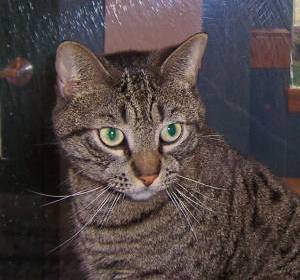

In [ ]:
img = cv2.imread('train/cat.1.jpg')
cv2_imshow(img)

In [ ]:
# consts 
Batch = 32
img_height , img_width, ch = 256,256,3
img_shape = (img_width,img_height)

# Dataframe Building
category = []
for i in filename:
    cate = i.split('.')[0]
    if cate == 'cat':
        category.append('cat')
    else:
        category.append('dog')

df = pd.DataFrame({
    'filename': filename,
    'class':category
})
            
       
 




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


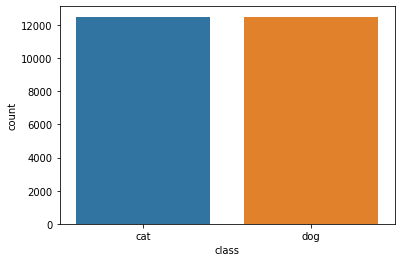

In [ ]:
sns.countplot(df['class'],data=df) 

In [ ]:
df

,filename,class
0,cat.12181.jpg,cat
1,dog.11798.jpg,dog
2,dog.1170.jpg,dog
3,dog.9005.jpg,dog
4,cat.10991.jpg,cat
...,...,...
24995,cat.7308.jpg,cat
24996,dog.4096.jpg,dog
24997,cat.7063.jpg,cat
24998,cat.3745.jpg,cat


# **Model Creation**

In [ ]:
 
#   Model  
model = Sequential() 
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (img_width,img_height,ch)))    # Ist Conv layer or Input layer
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(16,(5,5),activation='relu'))    # Ist Conv layer or Input layer
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3)) 
model.add(Conv2D(64,(3,3),activation='relu'))                                        # 2nd Conv layer
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.3)) 
model.add(Conv2D(128,(3,3),activation='relu'))                                        # 2nd Conv layer
model.add(MaxPool2D(pool_size=(2,2))) 
# model.add(Dropout(0.3)) 
model.add(Conv2D(256,(3,3),activation='relu'))                                        # 2nd Conv layer
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.5)) 
model.add(Conv2D(256,(3,3),activation='relu'))                                          #3rd Conv layer
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.3)) 
model.add(Flatten())
# model.add(Dense(units=64,kernel_initializer='he_uniform',activation='relu'))          # 4th layer and Ist Dense layer
# model.add(Dropout(0.5))

model.add(Dense(units=2,activation='softmax'))                                          #6th layer and 3rd Dense layer or output layer
model.compile(optimizer= Adam(learning_rate=0.0002),loss= CategoricalCrossentropy(),metrics= [CategoricalAccuracy()])
model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 123, 123, 16)      12816     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 61, 61, 16)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 61, 61, 16)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 59, 59, 64)       

# **Splitting of Dataset**

In [ ]:

# Spliting dataset into train and test
train_df,test_df = train_test_split(df,test_size=0.2,random_state=8)
trian_df = train_df.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)

# **Making Image Data Generator**

In [ ]:

# Train Image Generator
train_datagen = ImageDataGenerator(rescale= 1./255)
train_gen = train_datagen.flow_from_dataframe(
    train_df,
    './train/',
    x_col= 'filename',
    y_col= 'class',
    target_size= img_shape,
    color_mode= 'rgb',
    class_mode= 'categorical',
    batch_size= Batch
)

# Test Image Generator
test_datagen = ImageDataGenerator(rescale= 1./255)
test_gen = test_datagen.flow_from_dataframe(
    test_df,
    './train/',
    x_col= 'filename',
    y_col= 'class',
    target_size= img_shape,
    color_mode= 'rgb',
    class_mode= 'categorical',
    batch_size= Batch
)



Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


# **Training**

In [ ]:
callback = EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=3)
checkpoint = ModelCheckpoint('dog_cat_30_eopchs_checkpoint.hdf5',moniter= 'val_loss', mode ='min')

history = model.fit(train_gen,epochs= 80 , validation_data= test_gen , validation_steps= 5000//Batch , steps_per_epoch= 20000//Batch , callbacks= [callback,checkpoint])
model.save("cats_vs_dogs_30_epochs.h5")


Epoch 1/80
625/625 [==============================] - 96s 153ms/step - loss: 0.6413 - categorical_accuracy: 0.6130 - val_loss: 0.5878 - val_categorical_accuracy: 0.6799
Epoch 2/80
625/625 [==============================] - 94s 150ms/step - loss: 0.5563 - categorical_accuracy: 0.7110 - val_loss: 0.5365 - val_categorical_accuracy: 0.7328
Epoch 3/80
625/625 [==============================] - 91s 146ms/step - loss: 0.5000 - categorical_accuracy: 0.7538 - val_loss: 0.4895 - val_categorical_accuracy: 0.7658
Epoch 4/80
625/625 [==============================] - 92s 147ms/step - loss: 0.4444 - categorical_accuracy: 0.7918 - val_loss: 0.4335 - val_categorical_accuracy: 0.7993
Epoch 5/80
625/625 [==============================] - 97s 155ms/step - loss: 0.3940 - categorical_accuracy: 0.8233 - val_loss: 0.4123 - val_categorical_accuracy: 0.8099
Epoch 6/80
625/625 [==============================] - 98s 156ms/step - loss: 0.3503 - categorical_accuracy: 0.8438 - val_loss: 0.3819 - val_categorical_acc

# **View Training and Validation graphs for loss and accuracy**

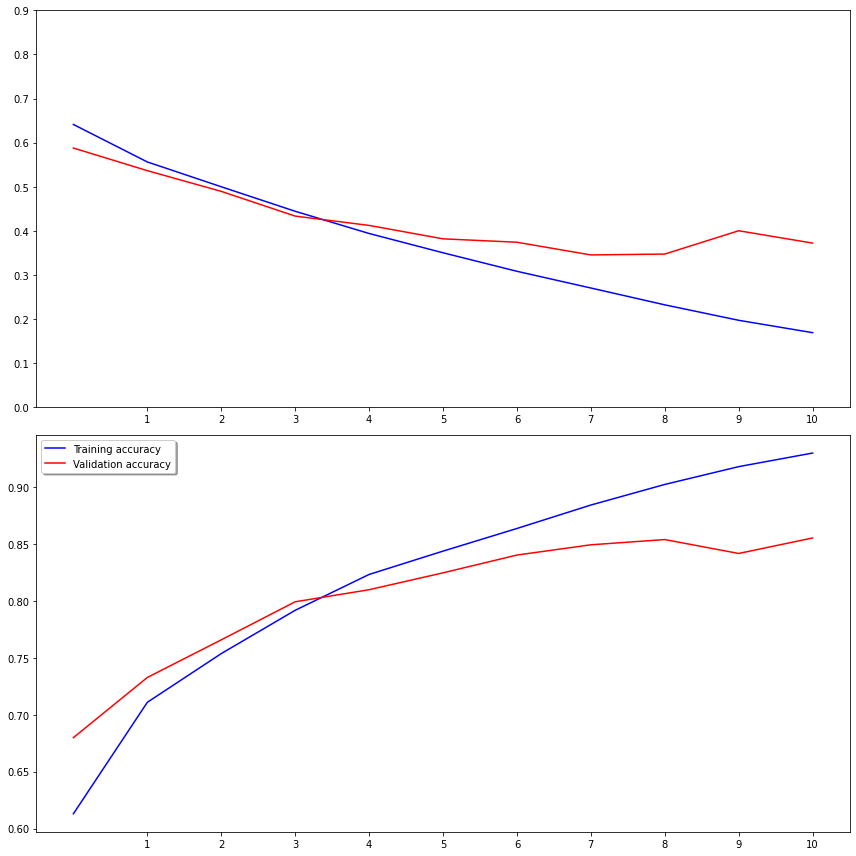

In [ ]:
import numpy as np
epochs = 11
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['categorical_accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_categorical_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# **Testing**

In [ ]:
foldername ='test1/'
filename = os.listdir(foldername)


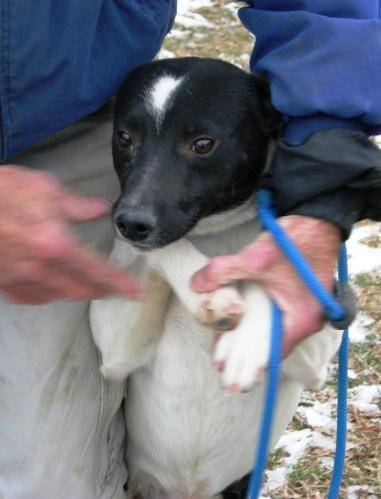

Dog


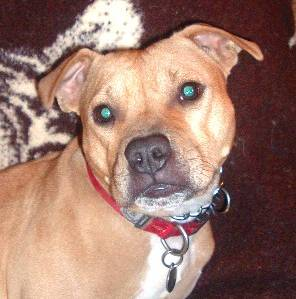

Dog


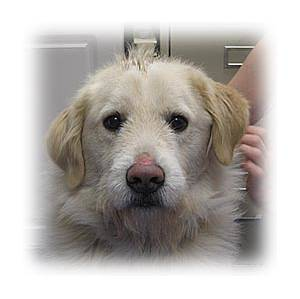

Dog


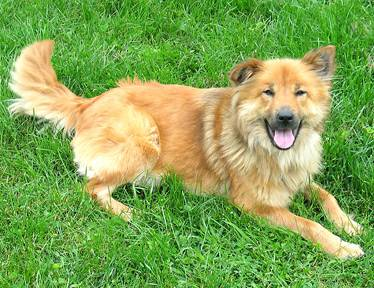

Dog


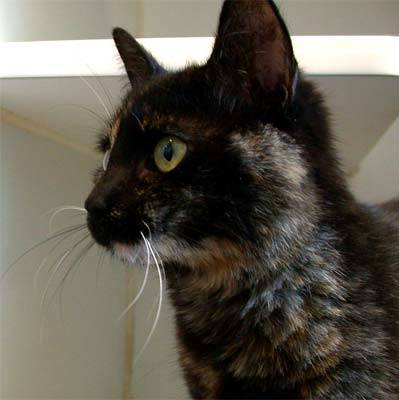

Cat


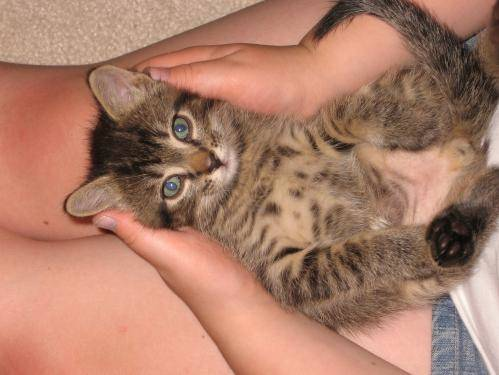

Dog


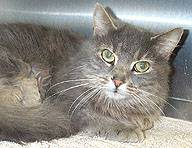

Cat


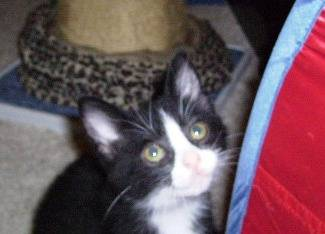

Cat


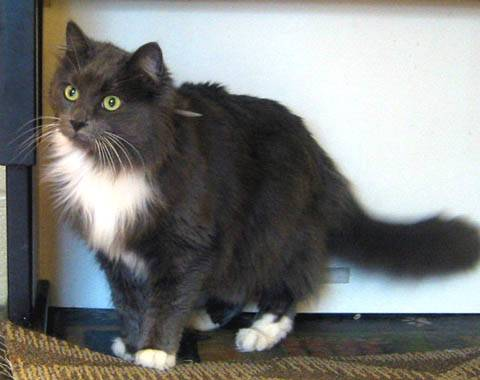

Cat


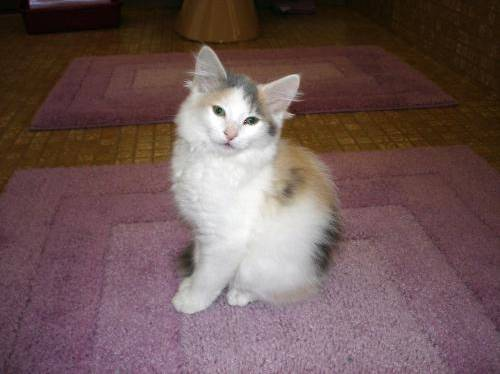

Cat


In [89]:
for i in range(10):
  img = cv2.imread('test1/{}.jpg'.format(i+1))
  cv2_imshow(img)
  img = cv2.resize(img,(256,256),interpolation = cv2.INTER_CUBIC)
  img =  img.reshape((1,256,256,3))
  pred =  model.predict(img)
  if pred[0][0] == 1:
    pred = 'Cat'
  else:
    pred = 'Dog'  
  print(pred)  